In [1]:
import pandas as pd

In [2]:
emp = pd.read_excel(r'C:\Users\sruja\datasets\Rawdata.xlsx')
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [3]:
id(emp)
# memory location

1969199958864

In [4]:
type(emp)

pandas.core.frame.DataFrame

In [5]:
emp.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [6]:
emp.shape

(6, 6)

In [7]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [8]:
emp.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [9]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [10]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [11]:
emp.isna()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [12]:
emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

# Data Cleaning

In [13]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [14]:
emp['Name'] = emp['Name'].str.replace(r'\W','',regex = True)    # Non-word characters

In [15]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [16]:
type(emp)

pandas.core.frame.DataFrame

In [17]:
type(emp['Name'])

pandas.core.series.Series

In [18]:
emp['Domain'] = emp['Domain'].str.replace(r'\W','',regex = True)  

In [19]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [20]:
emp['Age'] = emp['Age'].str.replace(r'\W','',regex = True)  
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [21]:
emp['Age'] = emp['Age'].str.extract('(\d+)')    # To extract only digits
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [22]:
emp['Location'] = emp['Location'].str.replace(r'\W','',regex = True)  
emp['Location']

# Though location appears clear, we still apply this technique because sometimes though the data appears clear, 
# while visualizing some non-string characters may be present. We want to avoid such scenarios.

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [23]:
emp['Salary'] = emp['Salary'].str.replace(r'\W','',regex = True)  
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [24]:
emp['Exp'] = emp['Exp'].str.extract('(\d+)')    # To extract only digits
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [25]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [26]:
clean_data = emp.copy()
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Applying EDA Techniques

### Missing value treatment for numerical data

In [27]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [28]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [29]:
import numpy as np

In [30]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))
# fill na with mean values

In [31]:
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [32]:
clean_data['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [33]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))
# fill na with mean values
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [34]:
type(clean_data)

pandas.core.frame.DataFrame

In [35]:
clean_data['Location'].isnull().sum()

2

### Missing value treatment for categorical data

In [36]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [37]:
clean_data.info()
# Note that now there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [38]:
clean_data['Age'] = clean_data['Age'].astype(int)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: int32(1), object(5)
memory usage: 392.0+ bytes


In [39]:
clean_data['Salary'] = clean_data['Salary'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')
clean_data.info()
# Converting 'object' type to 'category' for categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 862.0 bytes


In [40]:
clean_data.to_csv('clean_data.csv')
# To bring back data from the memory, rather than re-running the code again to clean the data

In [41]:
import os
os.getcwd()
# From the os, give the current working directory where the clean_data has been saved

'C:\\Users\\sruja\\Documents\\DATA SCIENCE AND AI'

### Visualization

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
import warnings
warnings.filterwarnings('ignore')

### Univariate analysis

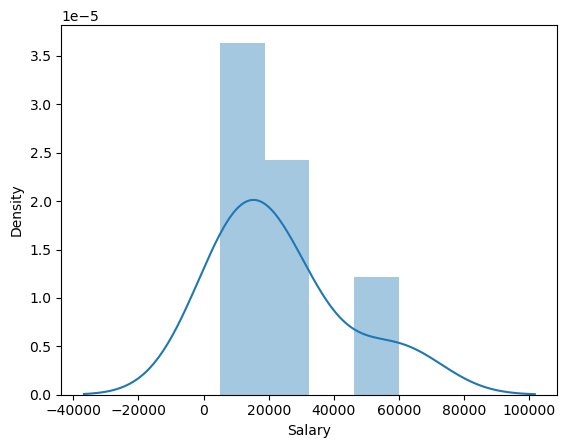

In [44]:
vis1 = sns.distplot(clean_data['Salary'])
# Univariate analysis (since only one variable is being used)
# plt.show(vis1) can be used if no output is obtained in the above step

#### Outlier detection

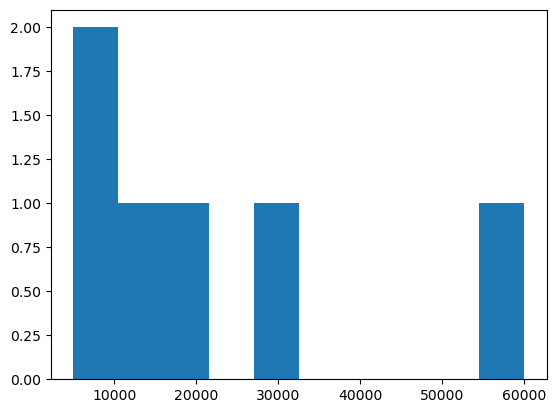

In [45]:
vis2 = plt.hist(clean_data['Salary'])
# Note the outlier, it did not clear appear in the previous graph.
# By visualizing in multiple ways, we are able to clearly understand the data

### Bivariate analysis

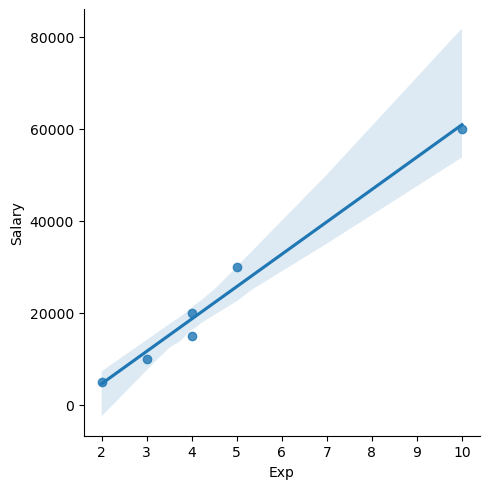

In [46]:
vis3 = sns.lmplot(data=clean_data, x='Exp', y='Salary')
# lmplot - Linear model plot
# Strongly positive correlation can be observed here

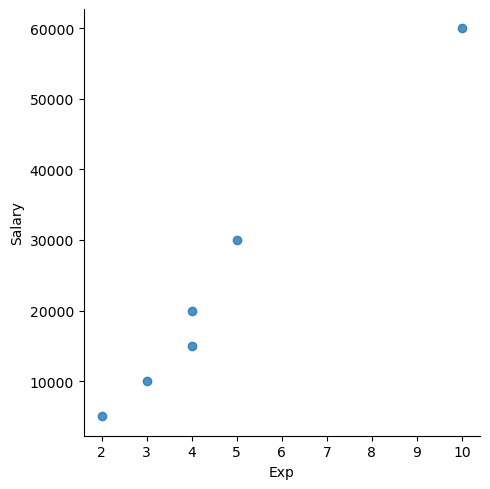

In [47]:
vis4 = sns.lmplot(data=clean_data, x='Exp', y='Salary', fit_reg = False)

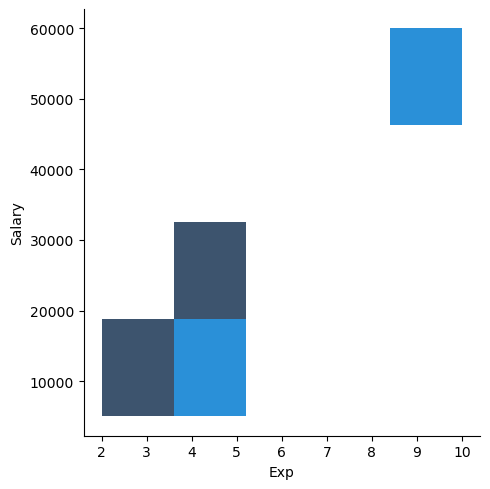

In [48]:
vis5 = sns.displot(clean_data, x='Exp', y='Salary')

In [49]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


How to split the data in variable identification?
From the dataset, remove the dependent variable and check to see the independent variables

#### Variable identification

In [50]:
x_iv = clean_data[['Name','Domain','Age','Location','Exp']]

In [51]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [52]:
y_dv = clean_data[['Salary']]
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [53]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [54]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [55]:
len(clean_data)

6

#### Tranformers/Variable Creation

In [56]:
imputation = pd.get_dummies(clean_data,dtype = int)
imputation
# This data is fed into machine learning models

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [57]:
len(imputation.columns)

19

   **Summary** 
   - EDA is also called as feature engineering
   - Data Cleaning
        - str.replace
        - 7 techniques to clean the raw data
   - Missing values treatment for numerical, categorical data   
   - Univariate analysis
   - Outlier identification
   - Variable identification
   - Variable transformation

Steps taken:

**Data cleaning**
1. import pandas as pd
2. Read the excel file
3. Understand the data at a high level by seeing what columns are present, info of the dataframe, see how many null values are there
4. Replace non-word characters with ''
5. Extract digits
6. Copy the clean data and save it as a new dataframe (here note the difference between clean_emp_data = emp vs clean_emp_data = emp.copy()

**Now, applying the EDA techniques**
1. Missing value treatment for categorical data (Location) - fill nan with mode , numeric data - fill nan with mean values (age,exp column)
2. Converting the datatype of objects to int, categorical where applicable
3. Saving the file to a csv, getting the current working directory of where the file has been saved

**Visualization**
1. distplot vs displot
2. histplot in sns and hist in plt (which matplotlib.pyplot)
3. Showing a histogram and kde overlay using a displot
4. sns.lmplot
5. sns.displot - applied in both univariate and bivariate analysis
6. Variable identification
7. Imputation/ Variable creation using pd.getdummies()

 
 **Code**
1. import pandas as pd
2. pd.read_excel(r'')
3. df.info()
4. df.isnull()
5. df.isnull.sum()
6. df.str.replace(r'\W','',regex=True)
7. df.str.extract('(\d+)') # Extract digits
8. import numpy as np
9. df.fillna(np.mean(pd.to_numeric(clean_emp_data['Age']))) - Mean Strategy
10. clean_emp_data['Location'] = clean_emp_data['Location'].fillna(clean_emp_data['Location'].mode()[0]) - Mode strategy
11. clean_emp_data['Age'] = clean_emp_data['Age'].astype(int)
12. clean_emp_data['Name'] = clean_emp_data['Name'].astype('category')
13. clean_emp_data.to_csv('clean_emp_data.csv')
14. import os
    os.getcwd()
15. import matplotlib.pyplot as plt
16. import seaborn as sns
17. import warnings
    warnings.filterwarnings('ignore')
18. vis_salary = sns.distplot(clean_emp_data['Salary'])
19. vis2 = plt.hist(clean_data['Salary'])
